## IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_sales_data.csv")

In [3]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


# PERFORMING EDA(EXPLORATORY DATA ANALYSIS)

In [4]:
df.isnull().sum()

,0
Manufacturer,0
Model,0
Engine size,0
Fuel type,0
Year of manufacture,0
Mileage,0
Price,0


In [5]:
df.duplicated().sum()

np.int64(12)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [8]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,13829.112387
std,0.734149,9.646056,71624.341062,16417.812203
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54375.250000,3059.750000
50%,1.600000,2004.000000,101011.500000,7971.000000
75%,2.000000,2012.000000,158617.250000,19028.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [9]:
df.value_counts('Manufacturer')

,count
Manufacturer,
Ford,14956
VW,14906
Toyota,12553
BMW,4964
Porsche,2609


In [10]:
df.shape

(49988, 7)

In [11]:
df.corr(numeric_only=True)

,Engine size,Year of manufacture,Mileage,Price
Engine size,1.000000,-0.000670,0.004365,0.398391
Year of manufacture,-0.000670,1.000000,-0.807643,0.714195
Mileage,0.004365,-0.807643,1.000000,-0.632817
Price,0.398391,0.714195,-0.632817,1.000000


In [12]:
df.select_dtypes(include='object').columns


Index(['Manufacturer', 'Model', 'Fuel type'], dtype='object')

# CHECKING THROUGH GRAPHS

<Axes: xlabel='Year of manufacture', ylabel='Price'>

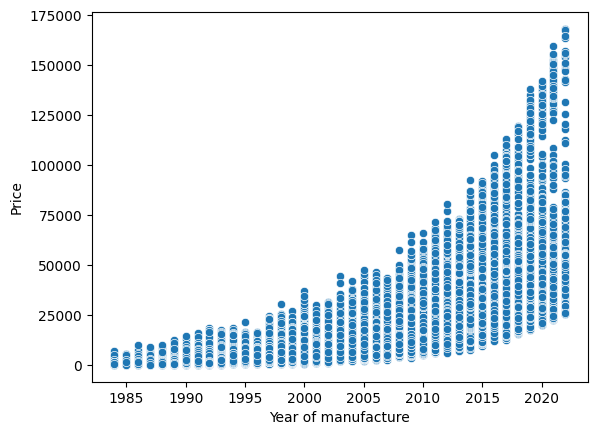

In [13]:
sns.scatterplot(x='Year of manufacture',y='Price',data=df)

<Axes: >

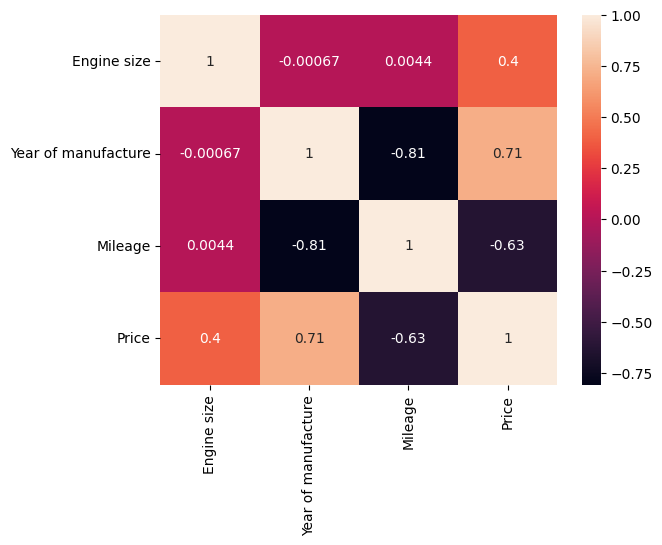

In [14]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True)

<Axes: xlabel='Manufacturer', ylabel='Count'>

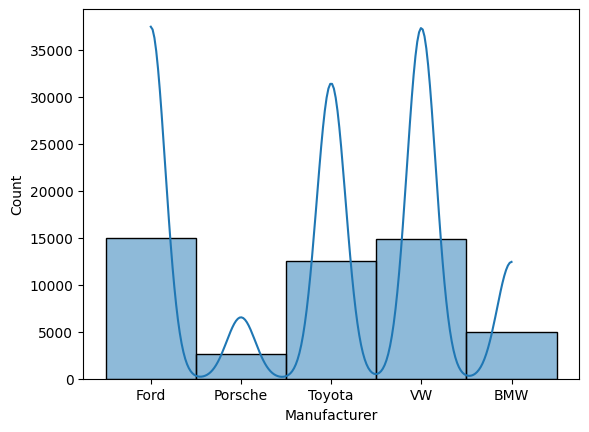

In [15]:
sns.histplot(df['Manufacturer'],kde=True)

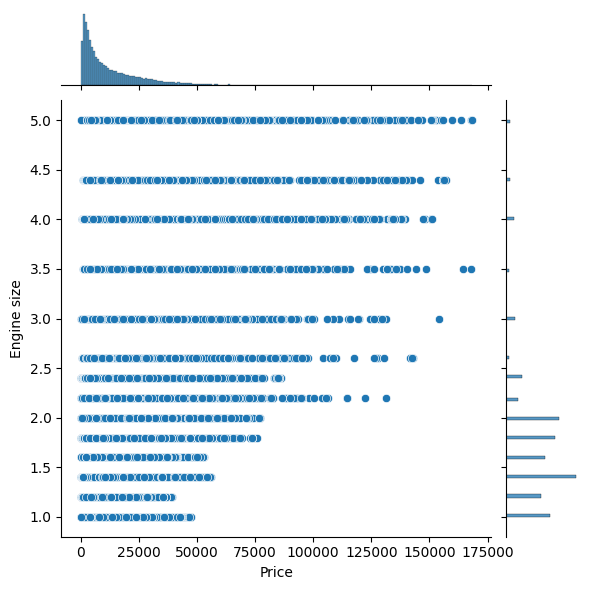

In [16]:
sns.jointplot(x='Price',y='Engine size',data=df)

In [17]:
df.head(1)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074


# LABEL ENCODING

In [18]:
from sklearn.preprocessing import LabelEncoder


In [19]:

cat_cols = ['Manufacturer','Model','Fuel type']
le = LabelEncoder()
for i in cat_cols:
  for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# FEATURE ENGINEERING

In [20]:
X = df.drop('Price',axis=1)
y = df['Price']

# TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STANDARD SCALING

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ALGORITHM IMPLEMENTATION

A Random Forest is an ensemble (collection) of many Decision Trees working together.

Each tree gives its prediction, and the forest takes the majority vote (for classification) or average (for regression).


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor()

In [26]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,20,30], #KITNE DECISION TREE BANANE HAI
    'max_depth': [10, 20,None], # IF AGAR KOI PURE DATA NHI MILTA HAI TOH MAX DEPTH LAGATE HAI
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [27]:
ge_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    n_jobs=-1,
    verbose=1
)

In [28]:
ge_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30]},
             verbose=1)

In [29]:
y_pred = ge_search.predict(X_test)

CHECKING THE R2 SCORE


The R-squared (R²) score, also known as the coefficient of determination, is a metric that tells you how well your model's predictions fit the actual data.

In [30]:
from sklearn.metrics import r2_score,adjusted_rand_score

In [31]:
R2_score = r2_score(y_test,y_pred)
print("MODEL R2 SCORE IS :-",R2_score)

MODEL R2 SCORE IS :- 0.9979746781685821


In [32]:
y_train_pred = ge_search.predict(X_train)
R2_score_train = r2_score(y_train,y_train_pred)
print("MODEL TRAINING R2 SCORE IS :-",R2_score_train)


MODEL TRAINING R2 SCORE IS :- 0.999657162131227


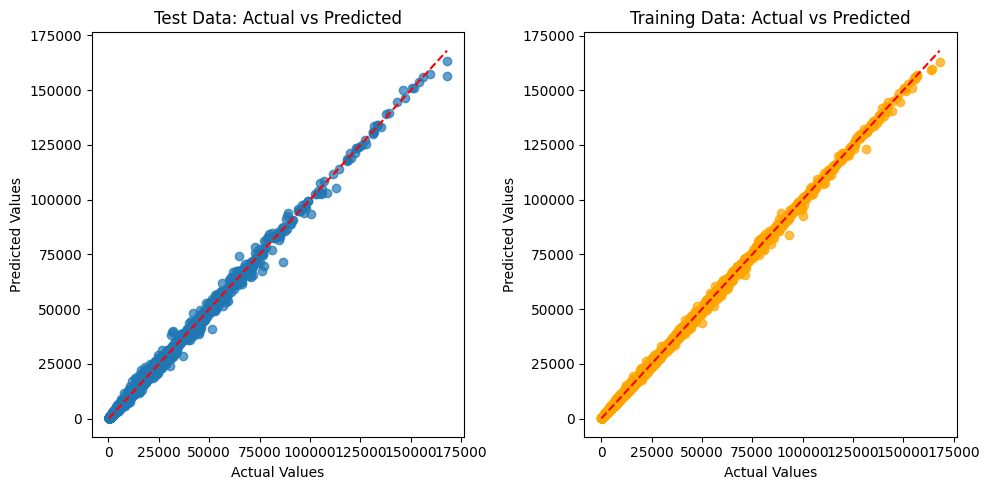

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for Test Data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line

# Scatter plot for Training Data
plt.subplot(1,2,2)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Data: Actual vs Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')

plt.tight_layout()
plt.show()


In [34]:
import pickle as pk
with open ('model.pkl','wb') as fs:
  pk.dump(ge_search,fs)